In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
customer=pd.read_csv("/content/drive/MyDrive/ML & AI/customers clustering.csv")

In [4]:
customer

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [6]:
x = customer.iloc[:,0:]
x

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [7]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state =1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

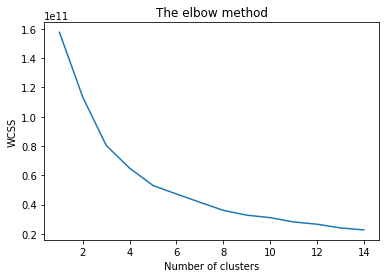

In [8]:
plt.plot(range(1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',random_state = 1)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 2, 2, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 3, 2, 2, 1, 1, 3, 4, 2, 1, 2, 2, 1, 1, 2, 3, 3, 4, 2, 2, 3, 3,
       1, 3, 3, 0, 1, 3, 1, 1, 4, 3, 2, 1, 3, 3, 1, 1, 1, 0, 1, 3, 1, 0,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 1, 1, 3, 1, 2, 1, 0, 0, 4,
       1, 2, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 3, 3, 1, 4, 1, 2, 3, 3, 1, 3,
       1, 3, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 4, 4, 2, 2, 1, 4, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 1, 2, 3, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 3, 3, 2, 1, 3, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 3,
       4, 1, 1, 1, 1, 4, 3, 4, 1, 1, 1, 1, 3, 3, 2, 1, 1, 3, 1, 2, 2, 1,
       1, 1, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 0, 1, 1, 3, 3, 3, 2, 3, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 4, 2, 2,
       2, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 2, 1, 2, 1, 1, 4, 4, 1, 1, 2, 1,
       3, 3, 3, 2, 3, 2, 1, 1, 1, 4, 1, 1, 2, 1, 1, 2, 1, 1, 4, 2, 4, 4,
       1, 2, 2, 4, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 2,

In [35]:
cluster_labels=pd.Series(y_kmeans)
customer['cl']=cluster_labels 
customer = customer.iloc[:,[5,0,1,2,3,4,6]]
customer

,Frozen,Channel,Region,Fresh,Milk,Grocery,cl
0,214,2,3,12669,9656,7561,1
1,1762,2,3,7057,9810,9568,1
2,2405,2,3,6353,8808,7684,1
3,6404,1,3,13265,1196,4221,1
4,3915,2,3,22615,5410,7198,2
...,...,...,...,...,...,...,...
435,13135,1,3,29703,12051,16027,2
436,4510,1,3,39228,1431,764,4
437,437,2,3,14531,15488,30243,3
438,1038,1,3,10290,1981,2232,1


In [36]:
print(customer.to_string()) 

     Frozen  Channel  Region   Fresh   Milk  Grocery  cl
0       214        2       3   12669   9656     7561   1
1      1762        2       3    7057   9810     9568   1
2      2405        2       3    6353   8808     7684   1
3      6404        1       3   13265   1196     4221   1
4      3915        2       3   22615   5410     7198   2
5       666        2       3    9413   8259     5126   1
6       480        2       3   12126   3199     6975   1
7      1669        2       3    7579   4956     9426   1
8       425        1       3    5963   3648     6192   1
9      1159        2       3    6006  11093    18881   3
10     4400        2       3    3366   5403    12974   3
11     1420        2       3   13146   1124     4523   1
12      287        2       3   31714  12319    11757   2
13     3095        2       3   21217   6208    14982   2
14      294        2       3   24653   9465    12091   2
15      397        1       3   10253   1114     3821   1
16      134        2       3   

In [37]:
cluster_labels

0      1
1      1
2      1
3      1
4      2
      ..
435    2
436    4
437    3
438    1
439    1
Length: 440, dtype: int32

In [39]:
customer.groupby(customer.cl).mean()

,Frozen,Channel,Region,Fresh,Milk,Grocery
cl,,,,,,
0,2564.571429,2.000000,2.571429,20031.285714,38084.000000,56126.142857
1,2438.349558,1.168142,2.535398,6143.871681,3276.792035,4115.163717
2,4182.784314,1.205882,2.539216,21337.549020,3933.852941,5176.068627
3,1591.111111,1.913580,2.518519,4991.481481,12140.543210,18505.506173
4,9462.791667,1.083333,2.708333,48777.375000,6607.375000,6197.791667
